In [1]:
from Jiaxin import *
from Peilun import *
from Yijun import *

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Getting the Dataset

Merge all given 10 dataframes on the foreign keys provided into 1 dataframe and convert this dataframe into a pickle file.

We chose to sample 100k rows out of the original 800k because we have relatively strongly correlated attributes in the dataset, so we do not need that much data to decrease the uncertainty in the parameters of our models.


In [2]:
# get_dataset()

## Cleaning the Dataset

Set the allowed percentage of missing data to be 50% in general, unless they are important columns (good predictors for regression). 

In this case, none of the columns with more than 50% missing data is important and we drop all of them.

In [3]:
df = clean_dataset()

## Exploratory Data Analysis

Now that our dataframe is ready, let's explore the dataset with a time series and interactive map.

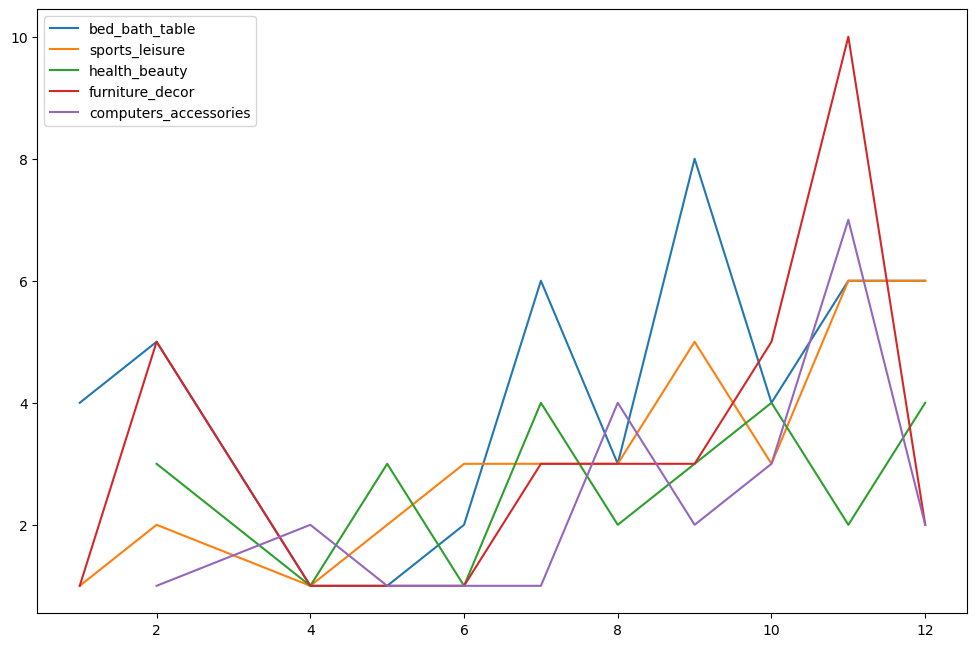

In [4]:
time_series()

We notice that there is a generally increasing trend in sales of all product categories over the year, and the spike is especially significant in November.

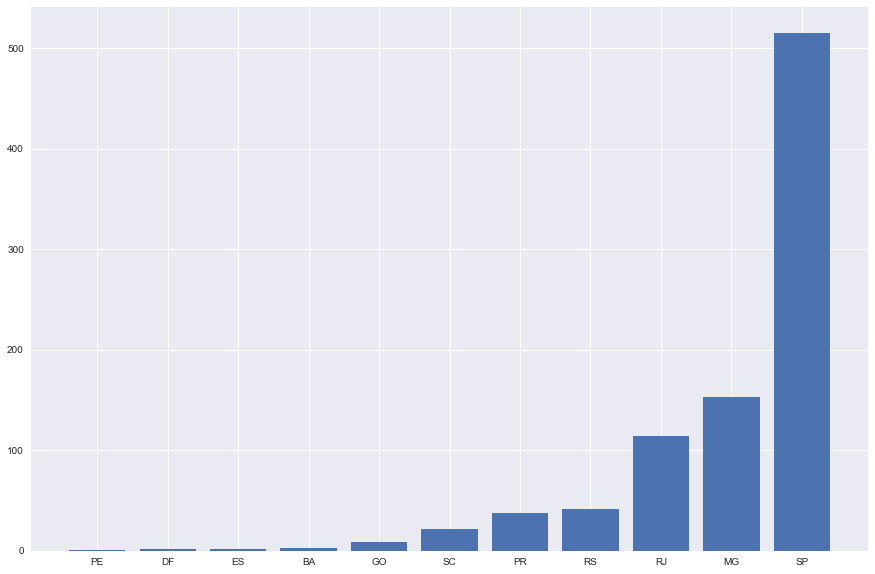

SP    515
MG    153
RJ    114
RS     42
PR     38
SC     22
GO      9
BA      3
ES      2
DF      2
PE      1
Name: customer_state, dtype: int64


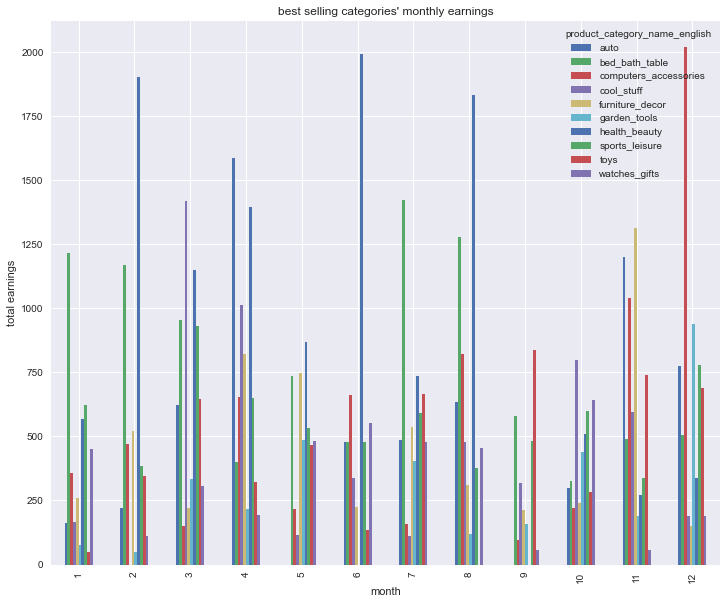

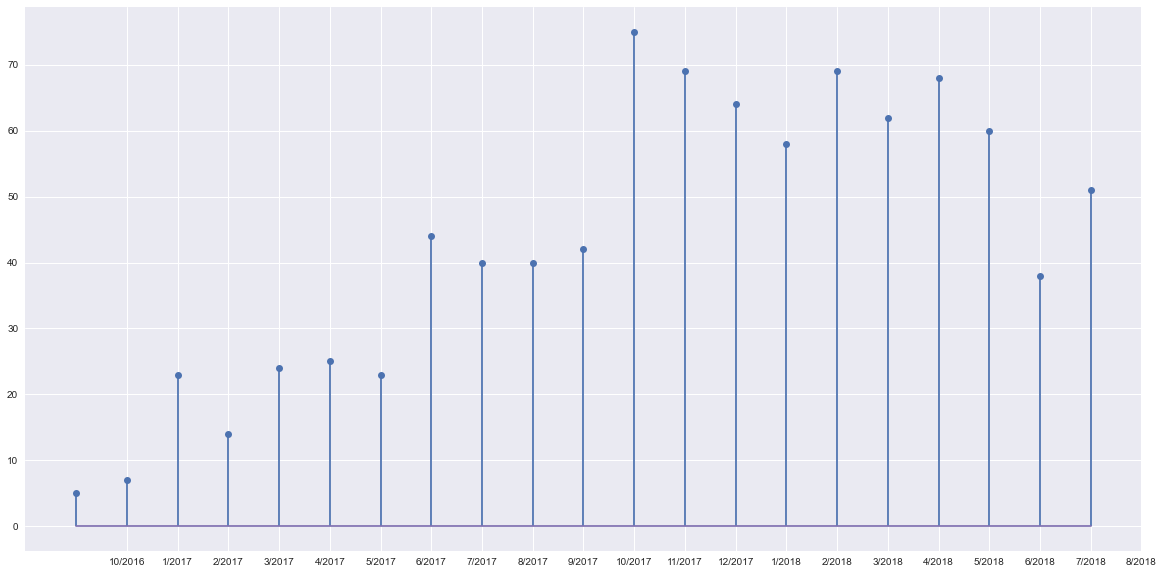

In [5]:
findings()

We order the number of customers by their states, and we find that most orders came from Sao Paulo. From the map, we can very clearly see the distribution of customers, with the radius of each circle corresponding to customer count from that state.

Then we look at the popularity of each category of products over the entire time period, and we notice that the sales of computer accessories is generally consistent, except in December where there was a huge increase.

Finally, the time series shows us that the period of high sales for Olist was Nov 2017 to Jun 2018.

---
# Problem 1: What are the factors affecting the price of a product?
First we take a look into all the correlation of numerical datas in the clean dataset by using a heatmap, and then plan out varius methods for feature selection to predict the price of a product.

## Feature Selection
> ### Pearson Correlation <br>
> Using Pearson Correlation to show all the correlation relationship between one and another.

                             review_score  payment_sequential  \
review_score                     1.000000           -0.023740   
payment_sequential              -0.023740            1.000000   
payment_installments            -0.132906           -0.106426   
payment_value                   -0.245989           -0.100922   
order_item_id                   -0.328874           -0.031022   
price                            0.038141           -0.020752   
freight_value                    0.047729           -0.010337   
product_name_lenght              0.010983           -0.046809   
product_description_lenght       0.093259            0.013720   
product_photos_qty               0.079217           -0.011589   
product_weight_g                 0.017728            0.029739   
product_length_cm                0.060084           -0.020406   
product_height_cm                0.001282            0.024370   
product_width_cm                -0.012304           -0.060411   
seller_zip_code_prefix   

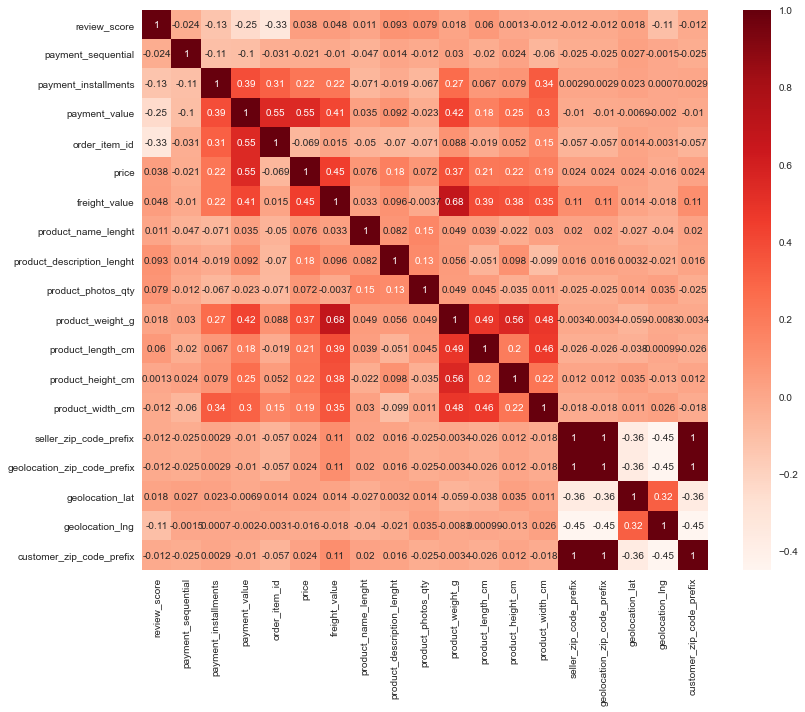

In [6]:
Pearson_Corr_values()

> ### Principal Component Analysis (PCA)
> *PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.*<br>
>
> Finds and chooses the optimal variables to be used to be our predictors against `price`

---Principal components---


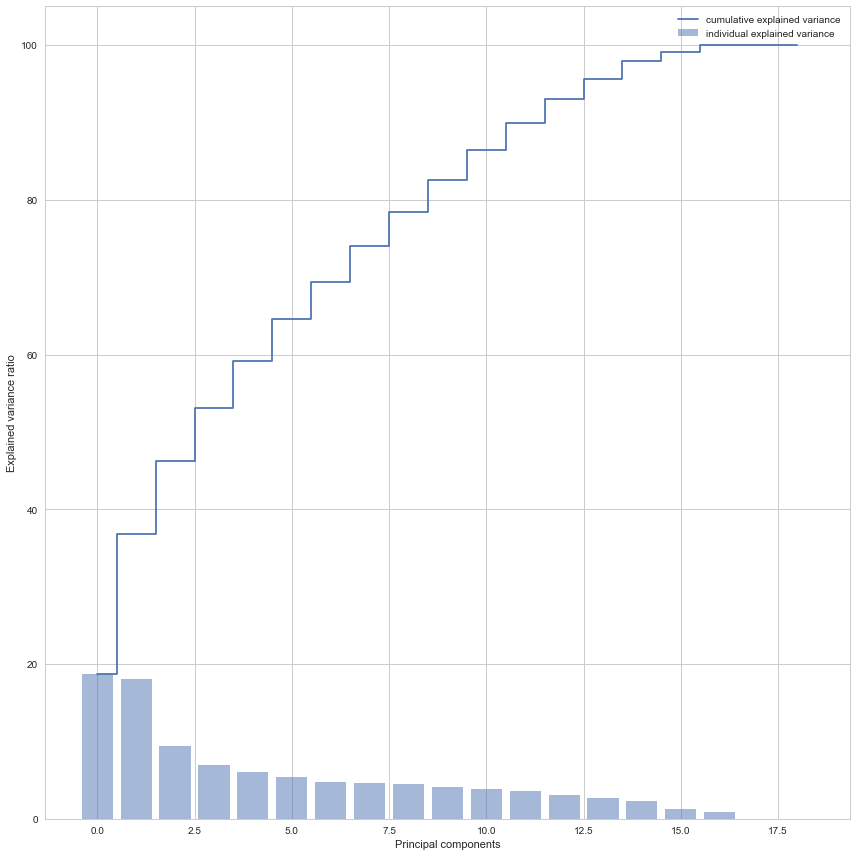

In [7]:
Principal_comp()

> ### Model Based Feature Selection
> *Displays the features importance in regards to the data using DecisionTreeCrassifier*

---Model-based feature selection (SelectFromModel)---


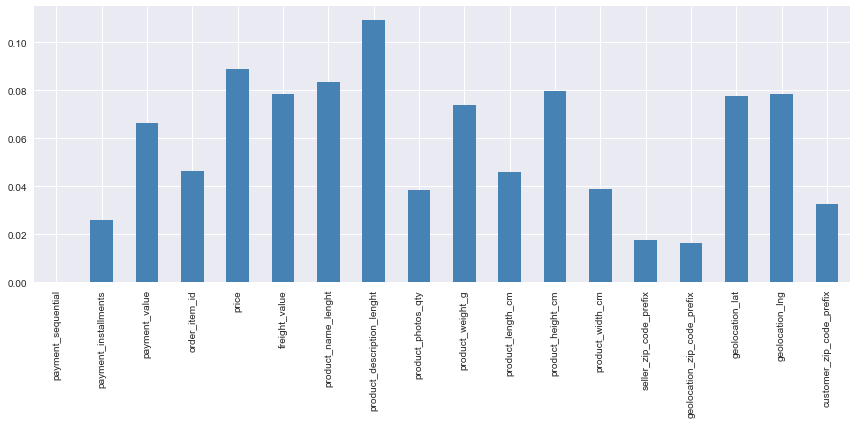

In [8]:
Model_based_fs()

> ### Filtered Pearson Correlation Values
> Now we display variables that only have a correlation score of higher than absolute 0.3

In [9]:
Display_filtered_PCV(0.3)

---corr values that are more than 0.3 scores---

                                                                0
geolocation_zip_code_prefix geolocation_lng             -0.450477
geolocation_lng             seller_zip_code_prefix      -0.450477
customer_zip_code_prefix    geolocation_lng             -0.450477
geolocation_lng             geolocation_zip_code_prefix -0.450477
                            customer_zip_code_prefix    -0.450477
seller_zip_code_prefix      geolocation_lng             -0.450477
customer_zip_code_prefix    geolocation_lat             -0.361586
seller_zip_code_prefix      geolocation_lat             -0.361586
geolocation_lat             customer_zip_code_prefix    -0.361586
                            geolocation_zip_code_prefix -0.361586
                            seller_zip_code_prefix      -0.361586
geolocation_zip_code_prefix geolocation_lat             -0.361586
review_score                order_item_id               -0.328874
order_item_id              

> ### Features Selected
> We then now look into variables that are higher than 0.3 correlation against Price.

In [10]:
Target_corr(0.3,'price')

---Features Selected---
payment_value       0.551249
freight_value       0.448640
product_weight_g    0.369152
Name: price, dtype: float64 



In our feature selection, our PCA showed that choosing three predictors would have a good cumulative explained variance of nearly half to represent this information too. Henceforth we will be using `payment_value`, `freight_value`, `product_weight_g` to do our prediction.


---
# Regression
To test and prove that these are some of the factors affecting the price of a product.

> #### Linear Regression
>* We import our dependencies, for linear regression we use sklearn (built in python library) and import linear regression from it. <br>
>* We again import another dependency to split our data into train and test.<br>
>* We've made our train data as 80% and 20% of the data to be our test data , and randomized the splitting of data by using random_state.<br>
>* Next, we fit our train and test data into linear regression model.<br>
>* After fitting our data to the model we found out our prediction, aka score of our data, is <50% accurate<br>

Train Set : (720, 3) (720, 1)
Test Set  : (181, 3) (181, 1)


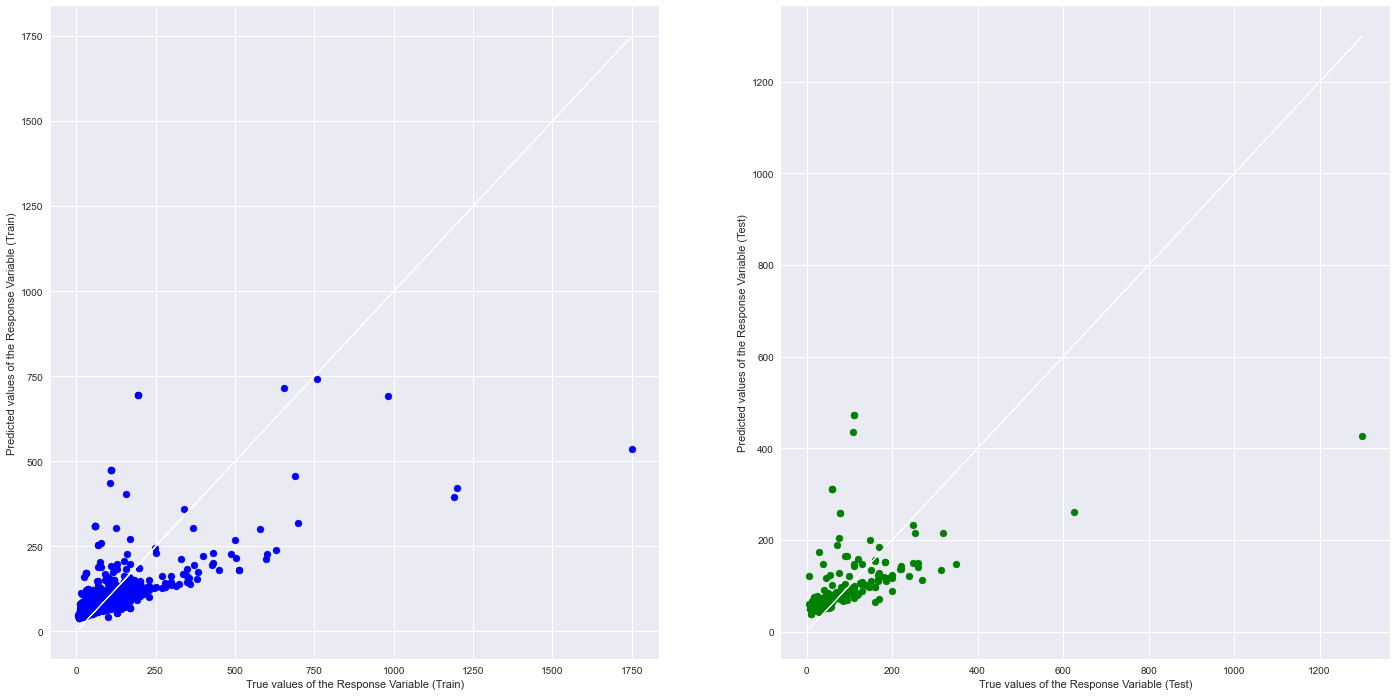

         Pred_Price    price  Difference     %_Error
397417        55.58     7.90      -47.68  603.544304
10290         43.08    99.90       56.82   56.876877
496345        87.77    69.00      -18.77   27.202899
21956         76.15   103.90       27.75   26.708373
624879       175.30   114.97      -60.33   52.474559
762934        88.61    79.00       -9.61   12.164557
1505905       70.40    29.90      -40.50  135.451505
546627       122.16   229.00      106.84   46.655022
12509        105.69   137.00       31.31   22.854015
1076322      139.60   359.90      220.30   61.211448
1287336       67.84    15.30      -52.54  343.398693
1250149      105.61    89.90      -15.71   17.474972
1275582      226.35   487.00      260.65   53.521561
821488        63.78    20.90      -42.88  205.167464
1461729      114.29   149.00       34.71   23.295302
182024        62.73    89.99       27.26   30.292255
169170       311.20    59.00     -252.20  427.457627
845961        59.02    39.00      -20.02   51.

In [11]:
Predict_Price_Linreg()

To improve our prediction to atleast 85% target, we use a different method named gradient boosting regression for building a better prediction model as it is also used by many experts. <br>
<br>
It is a machine learning technique for regression and classification problems, which produces a same yet better prediction model. <br>

---
> ### Gradient Boosting regression
> We create a variable where we define our gradient boosting regressor and set parameters to it , here:<br>
> - *n_estimator — The number of boosting stages to perform. We do not set it too high which would overfit our model.<br>*
> - *max_depth — The depth of the tree node.<br>*
> - *learning_rate — Rate of learning the data.<br>*
> - *loss — loss function to be optimized. ‘ls’ refers to least squares regression.<br>*
> - *minimum sample split — Number of sample to be split for learning the data.<br>*
>
> We then fit our training data into the gradient boosting model and we have obtained an much higher accuracy of **more than 80%** the previous value!<br>
>
> Thus we henceforth concludes that `payment_value`, `freight_value`, `product_weight_g` are indeed factors affecting the price of a product<br>



Train Set : (720, 3) (720, 1)
Test Set  : (181, 3) (181, 1)


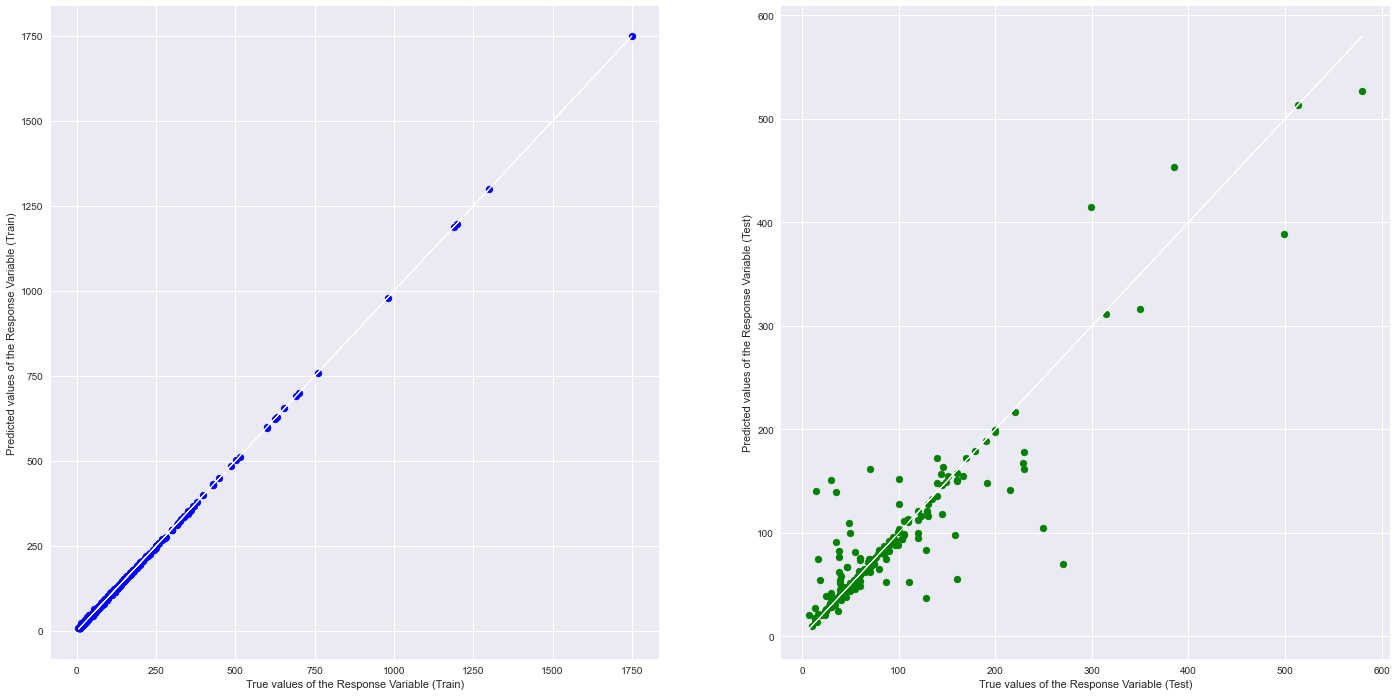

         Pred_Price    price  Difference    %_Error
397417         8.66     7.90       -0.76   9.620253
10290         99.71    99.90        0.19   0.190190
496345        68.91    69.00        0.09   0.130435
21956         94.38   103.90        9.52   9.162656
624879       116.08   114.97       -1.11   0.965469
762934        77.26    79.00        1.74   2.202532
1505905       29.97    29.90       -0.07   0.234114
546627       167.58   229.00       61.42  26.820961
12509        138.52   137.00       -1.52   1.109489
1076322      356.63   359.90        3.27   0.908586
1287336       13.85    15.30        1.45   9.477124
1250149       91.74    89.90       -1.84   2.046719
1275582      485.97   487.00        1.03   0.211499
821488        18.83    20.90        2.07   9.904306
1461729      149.15   149.00       -0.15   0.100671
182024        87.93    89.99        2.06   2.289143
169170        59.18    59.00       -0.18   0.305085
845961        54.52    39.00      -15.52  39.794872
313147      

In [12]:
Predict_Price_clf()

From this we could be able to estimate the final price of an item being listed and sold on Olist, and from the point in perspective in interest:

- How much Olist could tax or gain commissions from customers/sellers to maximise profit gains by using their platform.

- Able to compare prices from other platforms that sell cheaper alternatives by obtaining rival data and predicting and comparing their prices.


# Problem 2: Can we predict the category of Customer Lifetime Value (CLV) that customers fall into – low value, mid value, or high value?

Customer Lifetime Value (CLV) is the total monetary value of purchases made by a customer with a business over his entire lifetime - the time period that the customer purchases with the business before moving to your competitors.


*   Low Value: Customers who are less active than others, not very frequent buyers and generate very low/zero/negative revenue.

*   Mid Value: Customers who often use Olist (but not as much as our High Values) and generates moderate revenue.

*    High Value: The group we don’t want to lose. High revenue, frequency and low inactivity.

We will use 3 predictors: recency, frequency and monetary value (or revenue).

## Data Exploration of CLV

In [13]:
CLV_df = CLV_EDA(df)

Time Range: 2016-10-04 TO 2018-08-26
No. of unique customers: 720
Total sales: 96122.17000000001



## Recency

*Recency refers to the amount of time elapsed since a customer’s last transaction.*

Find the most recent purchase date of each customer and see how many days they are inactive for, then apply k-means clustering to assign customers a recency cluster.


count    901.000000
mean     242.207547
std      149.693629
min        0.000000
25%      123.000000
50%      227.000000
75%      343.000000
max      691.000000
Name: recency, dtype: float64




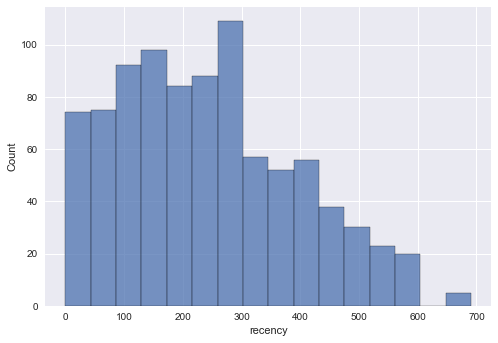

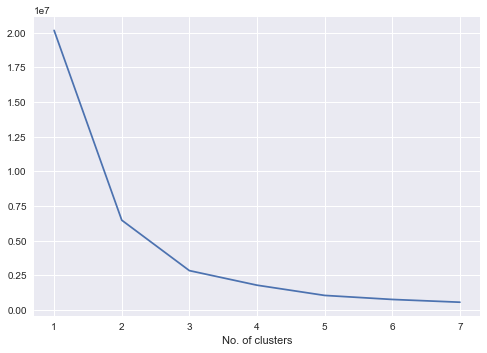

                 count        mean        std    min     25%    50%     75%  \
recency_cluster                                                               
0                294.0   82.904762  45.893233    0.0   43.75   82.5  119.50   
1                322.0  227.537267  41.729214  156.0  190.00  227.0  267.75   
2                184.0  369.179348  41.289931  299.0  334.00  373.0  404.25   
3                101.0  521.376238  55.783304  449.0  481.00  511.0  559.00   

                   max  
recency_cluster         
0                155.0  
1                297.0  
2                444.0  
3                691.0  




In [14]:
CLV_df = CLV_recency(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the recency values are clustered around the left tail of the distribution.

We also find that the most common customers are those with a recency score of 300.

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who have not bought from Olist for a long time) and cluster 3 being our best customers.

## Frequency

*Frequency refers to how often a customer has bought from the company.* 

Find the total number orders for each customer.


In [ ]:
CLV_df = CLV_frequency(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the frequency values are clustered around the left tail of the distribution.

We also find that the most common customers are those with frequency 1, that means most customers only make one time purchases.  

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who did not buy from Olist regularly) and cluster 3 being our best customers.

## Revenue

*Revenue refers to how much money a customer has spent with the company.*


In [ ]:
CLV_df = CLV_revenue(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the revenue values are clustered around the left tail of the distribution.

We also find that the most common customers are those with revenue 100.

Elbow method tells us that the optimal number of clusters is 3, with cluster 0 being our worst customers (customers who have spent the least on Olist products) and cluster 3 being our best customers.

## Overall RFM Score

Combine all 3 individual RFM scores into a single predictor, overall_score and sort it.

In [ ]:
CLV_df = overall_RFM(CLV_df)

We can see that score 0 is customers with the least value and 6 is customers with the highest value.

## Categorizing Customers

*    0 to 1: low value
*    2 to 3: mid value
*    4 to 6: high value

In [ ]:
CLV_df = categorize(CLV_df)

## Plot Clusters

In [ ]:
plot_clusters(CLV_df)

We see that the clusters for recency, frequency and revenue are distinct from one another. 

There are not many high value customers, which is expected given the low recency, frequency (most are one time purchases), and revenue, resulting in a low or mid customer lifetime value.

## Splitting Dataset into First 7 Months and Next 14 Months

From our timeseries, we have 21 months of data, from 2016 Oct to 2018 Aug. We take the first 7 months of data and use it to predict CLV for the next 14 months.

There is no cost specified in the dataset, so we take our response CLV to be the same as our predictor revenue.

In [ ]:
CLV_7m, CLV_14m = split_months(CLV_df)

## Merging the Original Dataframe with the 14 Months Dataframe

In [ ]:
CLV_merged = get_CLV_merged(CLV_14m, CLV_df)

We note that the dataset is imbalanced since 97% of the customers belong to cluster 0 (low value customers).

## Correlation

Before building the model, let's look at the correlation between our predictor, overall RFM score, and response, CLV_cluster. Let's also do the same for CLV (the absolute number).

In [ ]:
correlation_plot(CLV_merged)
print_correlation(CLV_merged)

From the correlation numbers, we see that revenue, frequency and overall_score will be helpful in predicting CLV_cluster.

The scatter plot also makes it quite clear that there is a positive correlation between overall_score in particular and CLV: the higher the RFM score, the higher the CLV.

## Converting Categorical Variable "category" to Numeric

In order for us to use XGBoost to predict CLV based on the "category" column, we need to convert the categorical values to numeric first, using one hot encoding.


In [ ]:
CLV_merged = one_hot_encoding(CLV_merged)

## Classification

In [ ]:
XGB_classification(CLV_merged)

Keeping in mind that our data is so imbalanced (97% of all customers are in the low value cluster), our predictor almost always predicts any given customer as a low value customer and this leads to high accuracy, which tells us nothing about how well our model is doing.

This means that using accuracy as a metric is not ideal, and we use f1 score instead, which takes into account this class imbalance. We consider recall to be twice as important as precision in our model - it is worse to misclassify a mid/high value customer to be low value and miss out on engagement, than to misclassify a low value customer to be mid/high value. We find that we get a pretty good f1 score of 0.830.

# Insights

## ------------------REGRESSION PART LEFT----------------

Now that we have the segmentation, we can start taking actions. The goals for each group are as follows:

*   Low Value: increase frequency
*   Mid Value: increase frequency + improve retention 
*   High Value: improve retention